Problem Defination:The prediction task is to determine whether a person makes over $50K a year.

First Import all necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

load data set

In [3]:
ds=pd.read_csv("census.csv")

In [4]:
ds.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25903 entries, 0 to 25902
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             25903 non-null  int64 
 1   Workclass       25903 non-null  object
 2   Fnlwgt          25903 non-null  int64 
 3   Education       25903 non-null  object
 4   Education_num   25903 non-null  int64 
 5   Marital_status  25903 non-null  object
 6   Occupation      25903 non-null  object
 7   Relationship    25903 non-null  object
 8   Race            25903 non-null  object
 9   Sex             25903 non-null  object
 10  Capital_gain    25903 non-null  int64 
 11  Capital_loss    25903 non-null  int64 
 12  Hours_per_week  25903 non-null  int64 
 13  Native_country  25903 non-null  object
 14  Income          25903 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.0+ MB


In [6]:
ds.shape

(25903, 15)

data set have 25903 rows and 15columns

# Checking Data types

In [7]:
ds.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

data set have some input features of int and object data type and target variable is object type

# Checking Missing Values

In [8]:
ds.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

data set have no missing values

<AxesSubplot:>

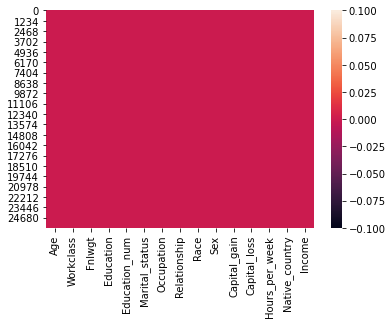

In [9]:
sns.heatmap(ds.isnull())

above heatmap shows that there is no missing value

# Stastical Summary

In [10]:
ds.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,25903.000000,2.590300e+04,25903.000000,25903.000000,25903.000000,25903.000000
mean,38.620005,1.896885e+05,10.080338,1094.485388,86.961935,40.405745
std,13.682391,1.052435e+05,2.562069,7501.172022,402.384115,12.303995
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.179630e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782950e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.368225e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Checking Correlation

In [11]:
ds.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.074231,0.033716,0.074739,0.057135,0.066986
Fnlwgt,-0.074231,1.000000,-0.043011,0.003319,-0.012438,-0.015886
Education_num,0.033716,-0.043011,1.000000,0.122340,0.080487,0.147202
Capital_gain,0.074739,0.003319,0.122340,1.000000,-0.031535,0.076753
Capital_loss,0.057135,-0.012438,0.080487,-0.031535,1.000000,0.056776
Hours_per_week,0.066986,-0.015886,0.147202,0.076753,0.056776,1.000000


<AxesSubplot:>

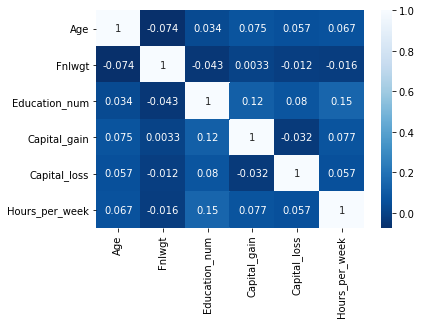

In [12]:
sns.heatmap(ds.corr(),annot=True,cmap='Blues_r')

above heatmapshows the correlaton between different variables,

In [13]:
df=pd.DataFrame(ds)

importing data set into pandas dataframe

In [14]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Visualazation of categorical data

 Private             18014
 Self-emp-not-inc     2041
 Local-gov            1692
 ?                    1453
 State-gov            1028
 Self-emp-inc          892
 Federal-gov           768
 Without-pay            10
 Never-worked            5
Name: Workclass, dtype: int64


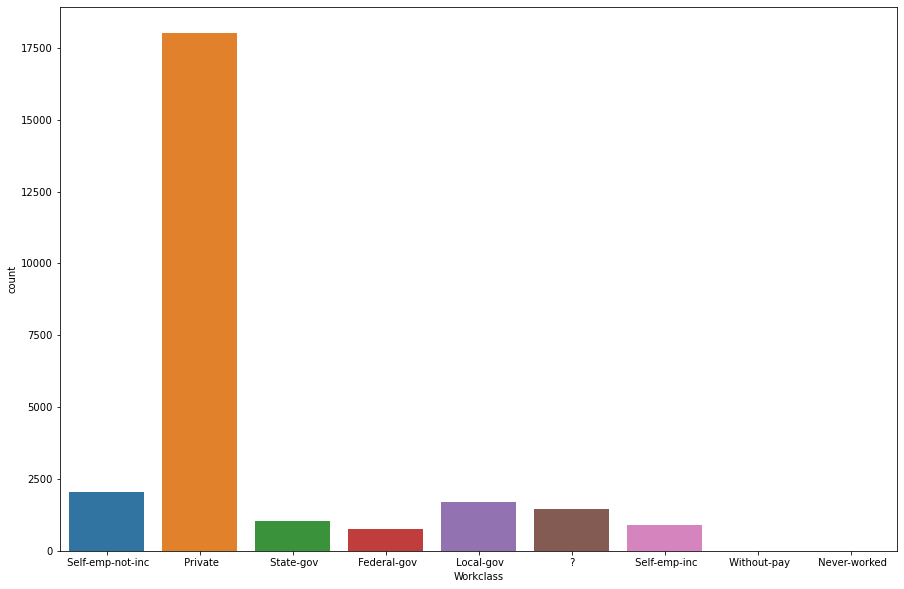

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(df['Workclass'])
print(df['Workclass'].value_counts())

above countplot of workclass shows the categories of workclass and values of that categories

 HS-grad         8386
 Some-college    5800
 Bachelors       4286
 Masters         1351
 Assoc-voc       1094
 11th             939
 Assoc-acdm       838
 10th             755
 7th-8th          514
 Prof-school      446
 9th              412
 12th             337
 Doctorate        329
 5th-6th          254
 1st-4th          122
 Preschool         40
Name: Education, dtype: int64


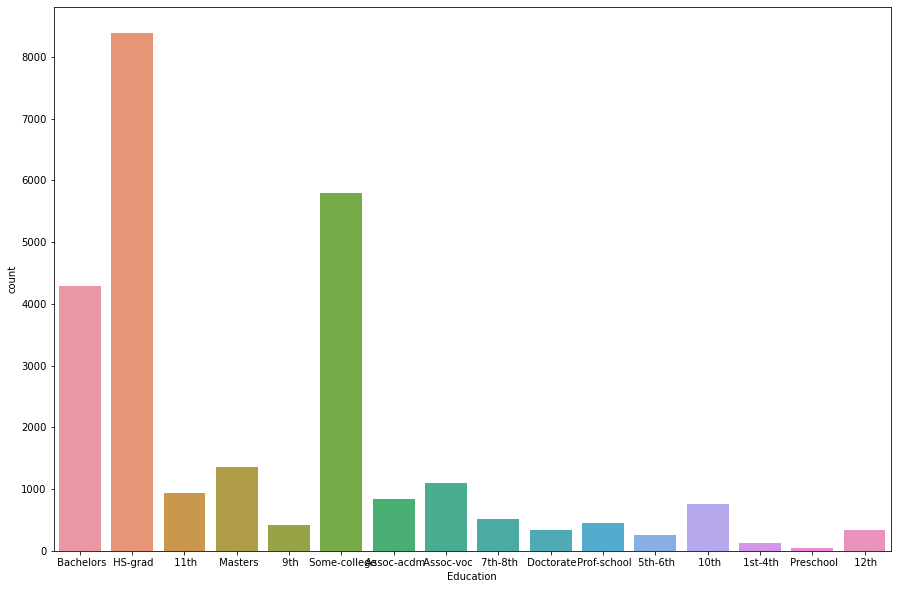

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(df['Education'])
print(df['Education'].value_counts())

above countplot of education shows different types of education  

 Married-civ-spouse       11860
 Never-married             8500
 Divorced                  3562
 Separated                  822
 Widowed                    798
 Married-spouse-absent      343
 Married-AF-spouse           18
Name: Marital_status, dtype: int64


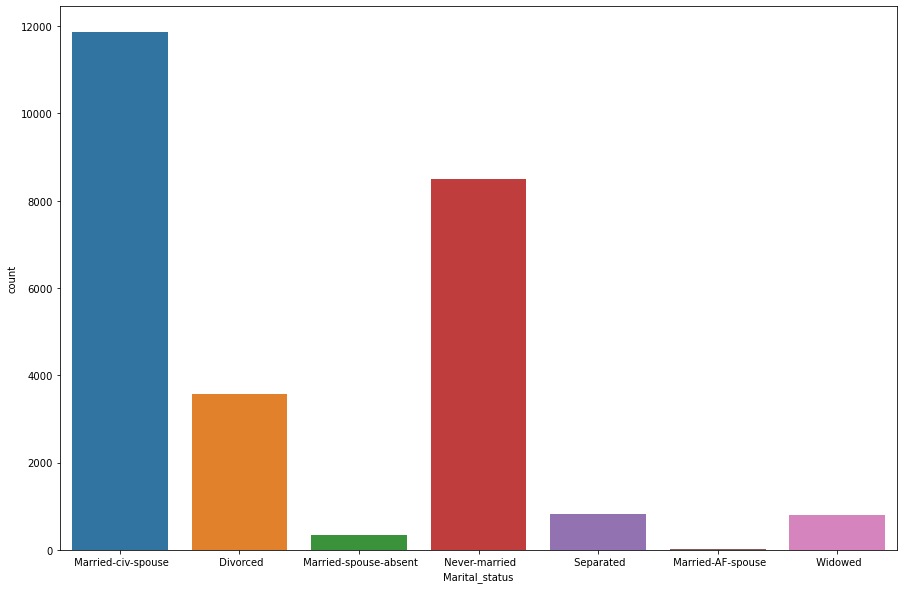

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(df['Marital_status'])
print(df['Marital_status'].value_counts())

above countplot shows marital status and it's counting 

 Prof-specialty       3304
 Craft-repair         3242
 Exec-managerial      3193
 Adm-clerical         3059
 Sales                2916
 Other-service        2652
 Machine-op-inspct    1585
 ?                    1458
 Transport-moving     1275
 Handlers-cleaners    1049
 Farming-fishing       790
 Tech-support          727
 Protective-serv       522
 Priv-house-serv       123
 Armed-Forces            8
Name: Occupation, dtype: int64


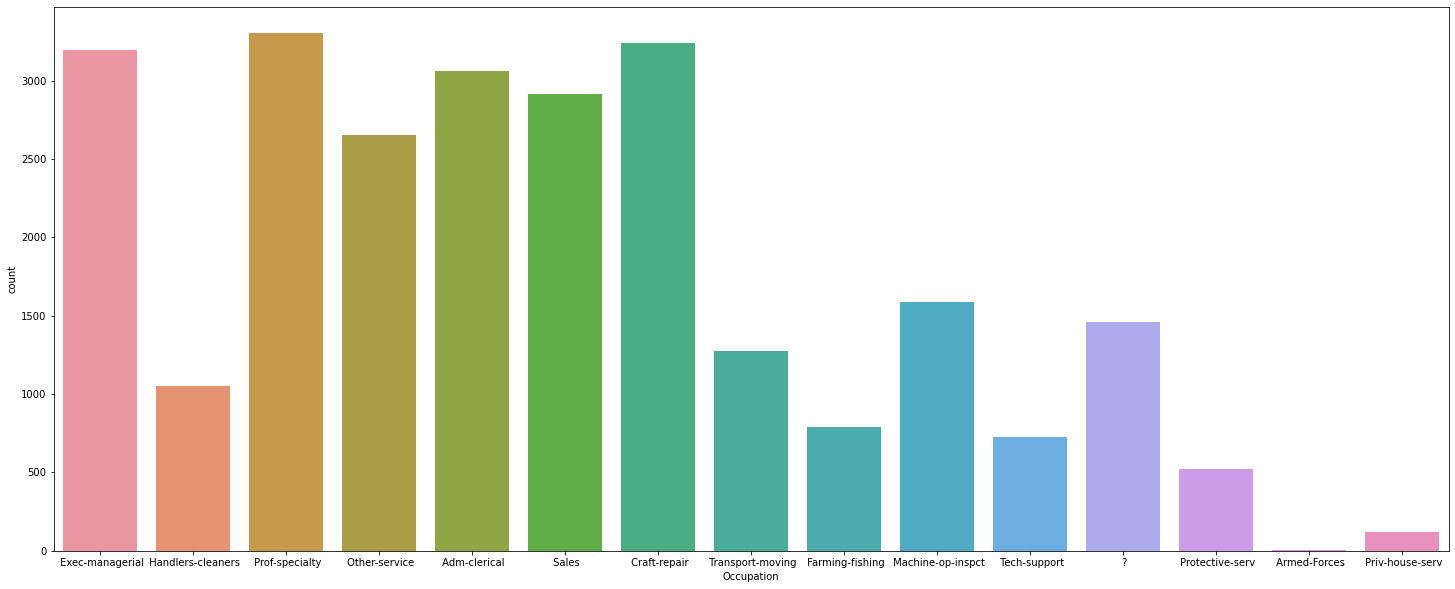

In [18]:
plt.figure(figsize=(25,10))
sns.countplot(df['Occupation'])
print(df['Occupation'].value_counts())

above countplot shows categories of accupation

 Husband           10439
 Not-in-family      6678
 Own-child          4038
 Unmarried          2738
 Wife               1252
 Other-relative      758
Name: Relationship, dtype: int64


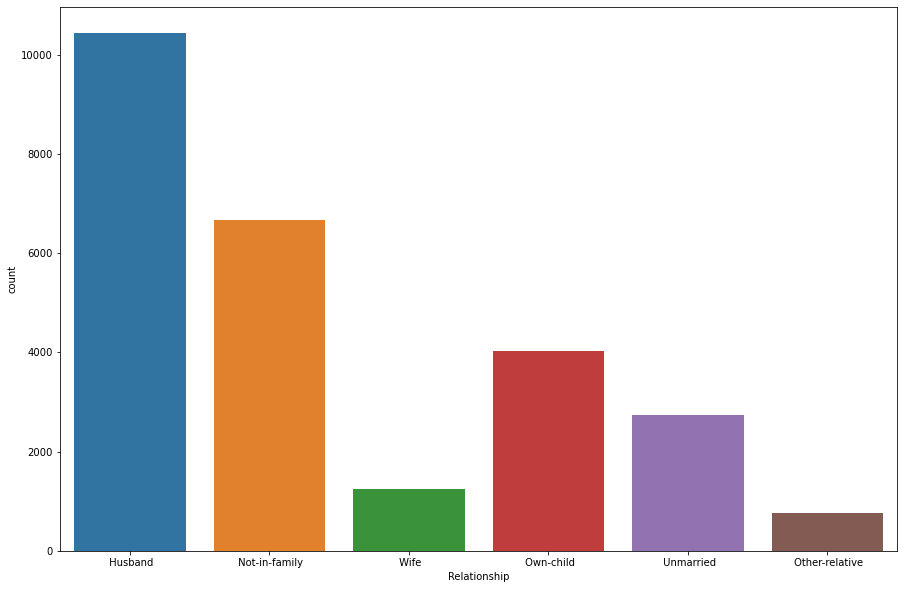

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(df['Relationship'])
print(df['Relationship'].value_counts())

above countplot shows relatioships

 White                 22158
 Black                  2463
 Asian-Pac-Islander      811
 Amer-Indian-Eskimo      251
 Other                   220
Name: Race, dtype: int64


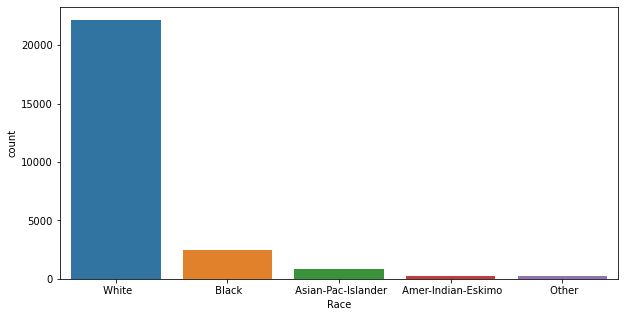

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(df['Race'])
print(df['Race'].value_counts())

 Male      17335
 Female     8568
Name: Sex, dtype: int64


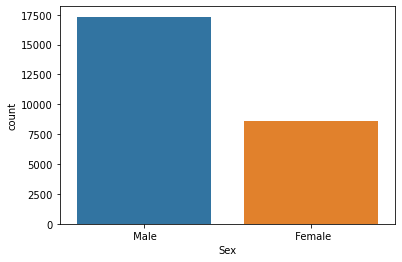

In [21]:
sns.countplot(df['Sex'])
print(df['Sex'].value_counts())

above countplot shows that there are more male candidates than female candidates

 United-States                 23220
 Mexico                          508
 ?                               465
 Philippines                     158
 Germany                         106
 Canada                          103
 Puerto-Rico                      99
 England                          78
 El-Salvador                      76
 Cuba                             74
 India                            71
 South                            67
 China                            63
 Jamaica                          60
 Italy                            55
 Dominican-Republic               55
 Poland                           53
 Guatemala                        53
 Vietnam                          51
 Japan                            49
 Columbia                         46
 Taiwan                           44
 Haiti                            38
 Iran                             37
 Portugal                         28
 Nicaragua                        27
 Greece                           23
 

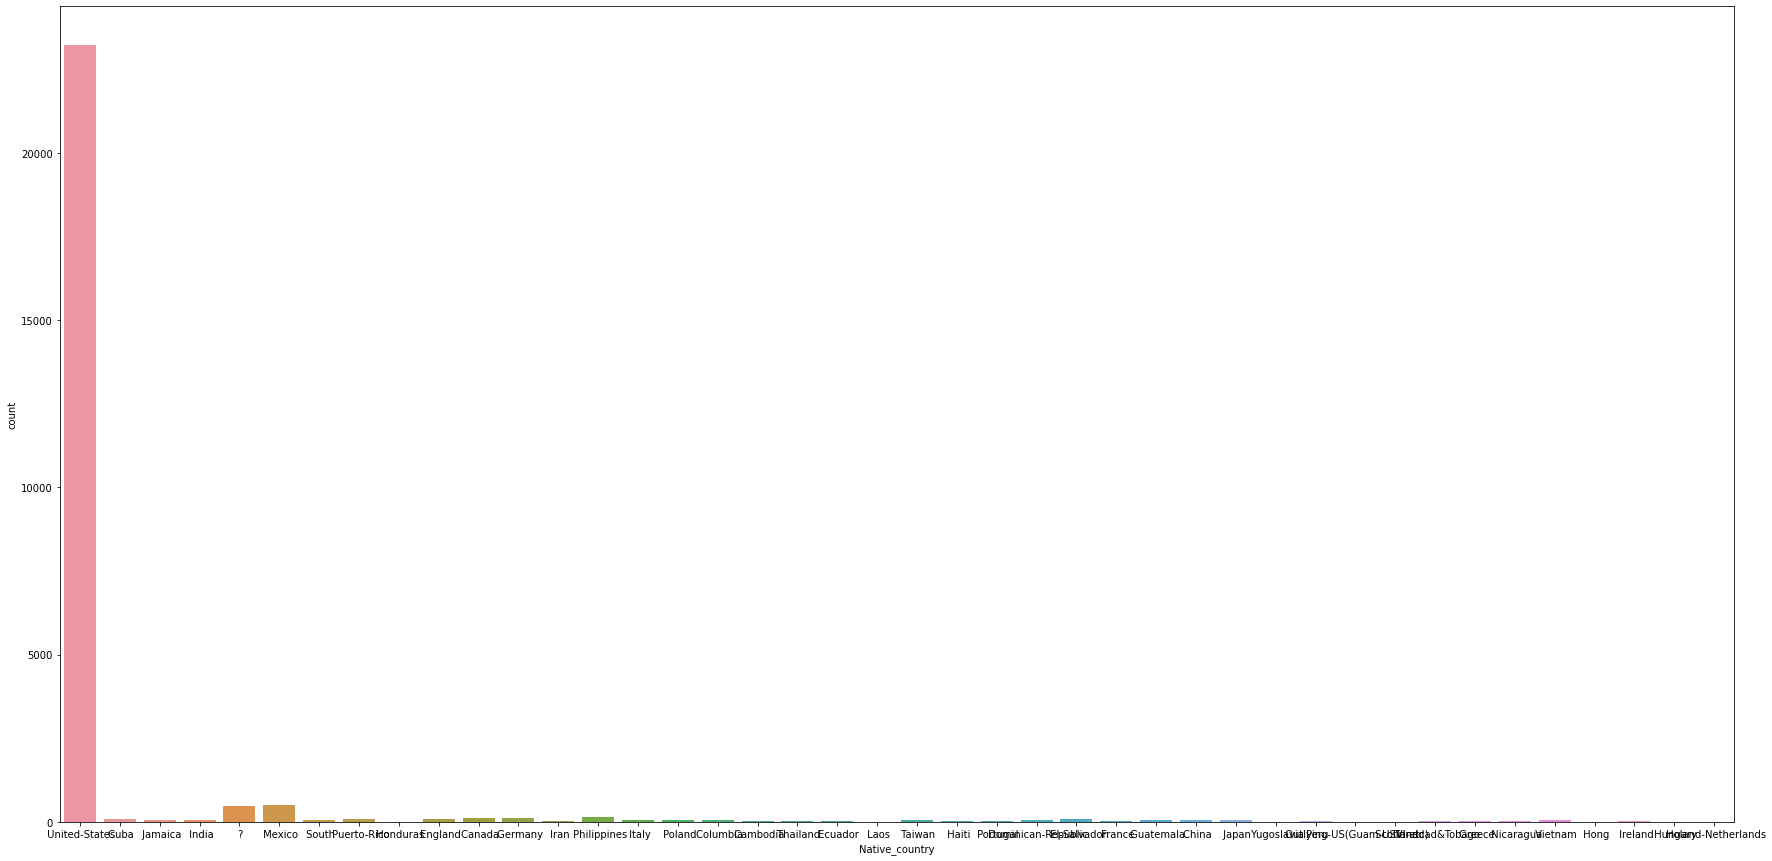

In [22]:
plt.figure(figsize=(30,15))
sns.countplot(df['Native_country'])
print(df['Native_country'].value_counts())

 <=50K    19702
 >50K      6201
Name: Income, dtype: int64


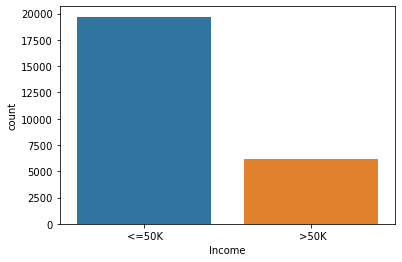

In [23]:
sns.countplot(df['Income'])
print(df['Income'].value_counts())

above countplot shows that data set have  class imbalance problem

In [24]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


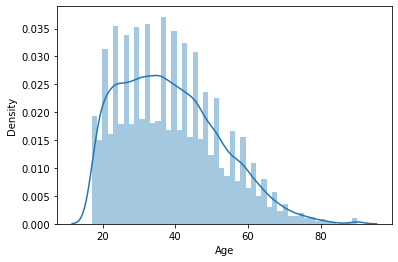

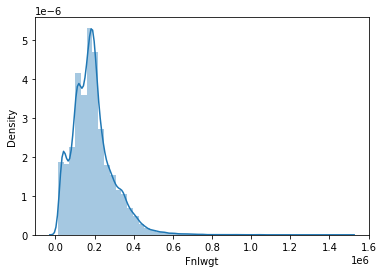

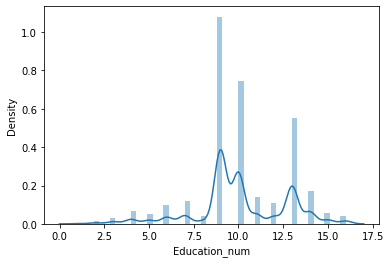

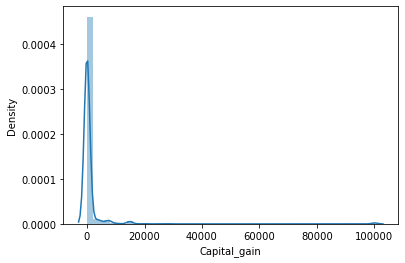

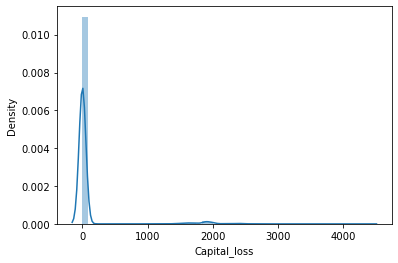

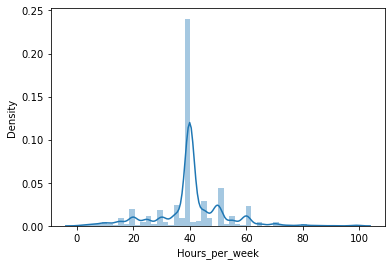

<Figure size 432x288 with 0 Axes>

In [25]:
cols=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
for i in df[cols]:
    sns.distplot(df[i])
    plt.figure()

above distribution plots hsows that some data columns such as Fnlwgt' ,'Capital_gain','Capital_loss have skewness,we have to dealwith it

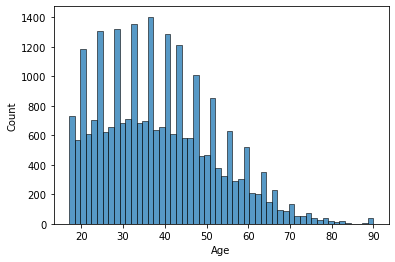

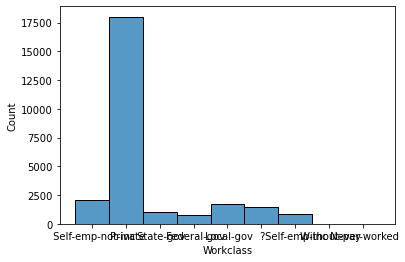

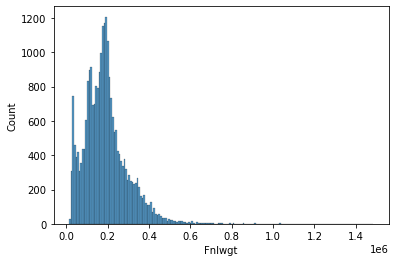

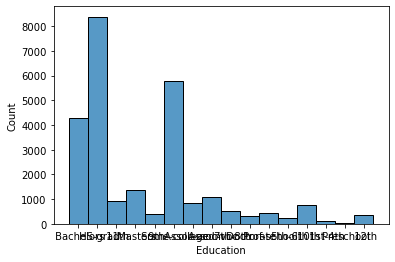

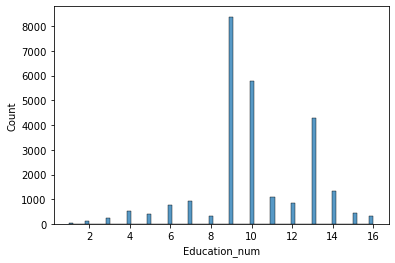

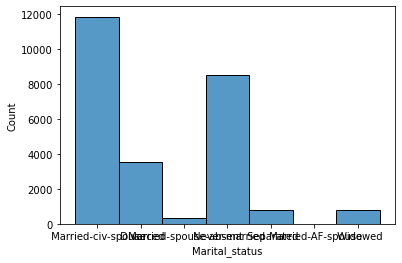

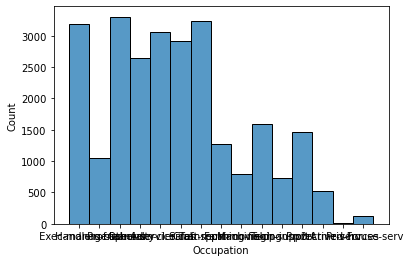

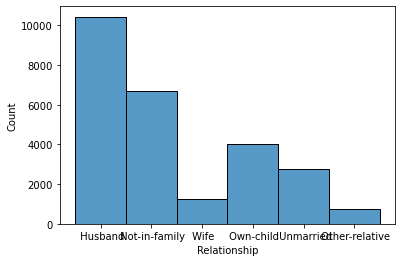

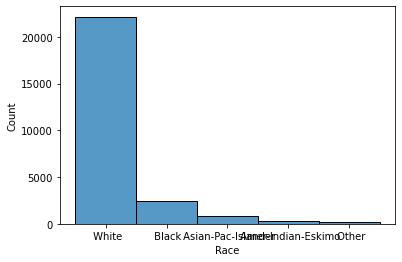

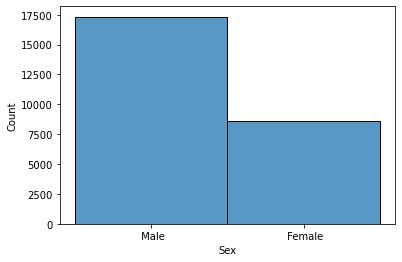

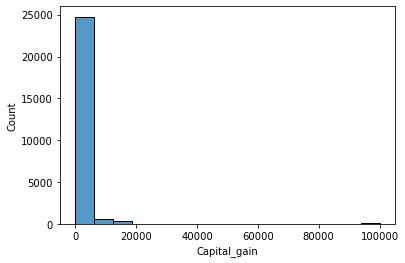

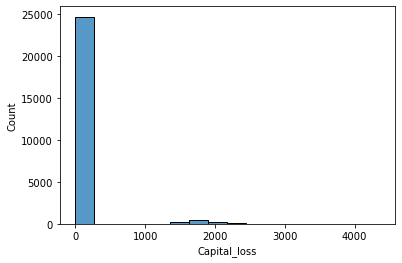

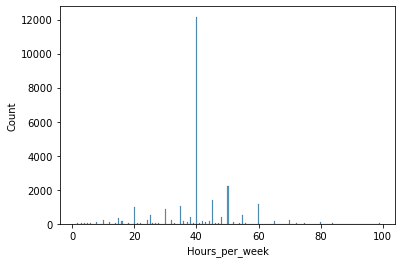

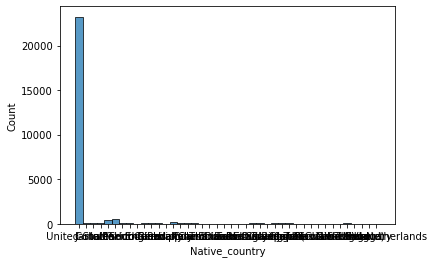

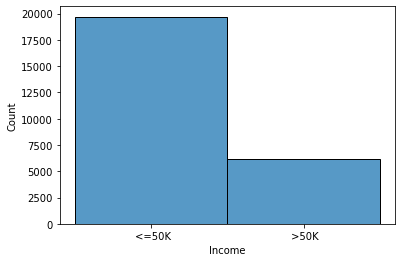

<Figure size 432x288 with 0 Axes>

In [26]:
for i in df.columns:
    sns.histplot(df[i])
    plt.figure()

histplots shows the frequecis of data in data frame

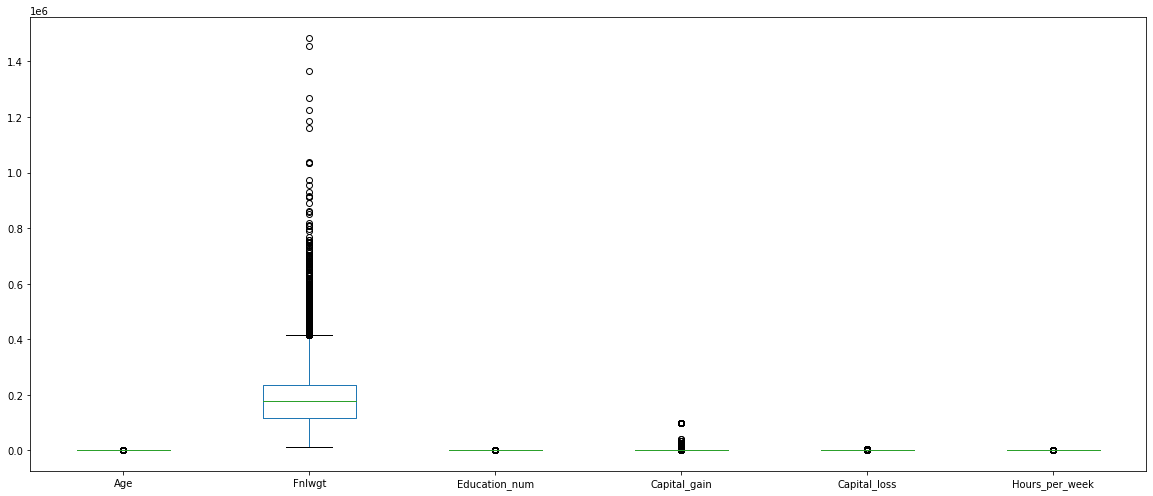

In [27]:
df.plot(kind='box',figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

above boxplot shows that there are some outliers present

In [28]:
df.skew()

Age                0.568191
Fnlwgt             1.464609
Education_num     -0.298953
Capital_gain      11.803971
Capital_loss       4.608749
Hours_per_week     0.222479
dtype: float64

Fnlwgt' ,'Capital_gain','Capital_loss', column have skewness

In [29]:
df2=df.iloc[:]

In [30]:
df2.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [31]:
df2.skew()

Age                0.568191
Fnlwgt             1.464609
Education_num     -0.298953
Capital_gain      11.803971
Capital_loss       4.608749
Hours_per_week     0.222479
dtype: float64

reducing skewnessusing log function

In [32]:
cols=['Fnlwgt' ,'Capital_gain','Capital_loss']
for i in df2[cols]:
    df2[i]=np.log(1+df2[i])


In [33]:
df2.skew()

Age               0.568191
Fnlwgt           -0.851226
Education_num    -0.298953
Capital_gain      3.093099
Capital_loss      4.318768
Hours_per_week    0.222479
dtype: float64

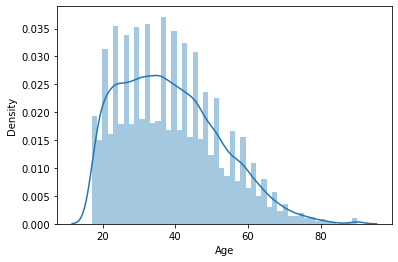

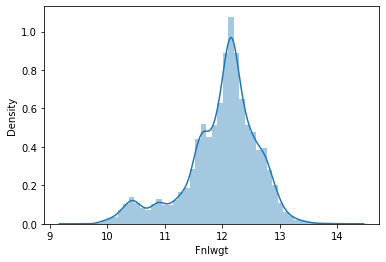

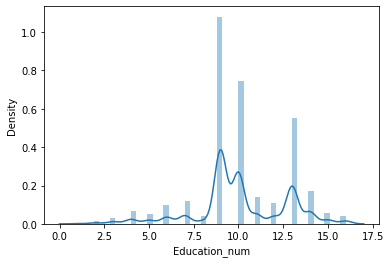

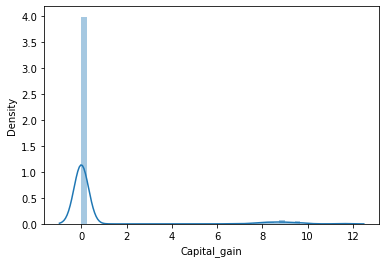

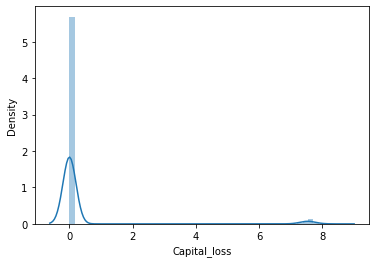

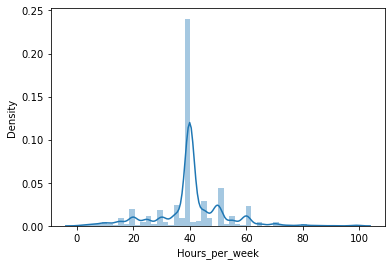

<Figure size 432x288 with 0 Axes>

In [68]:
cols=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
for i in df2[cols]:
    sns.distplot(df2[i])
    plt.figure()

# Encoding categorical data into numerical data

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()

In [36]:
df2['Workclass']=le.fit_transform(df['Workclass'])

In [37]:
df2['Education']=le.fit_transform(df['Education'])

In [38]:
df2['Marital_status']=le.fit_transform(df['Marital_status'])

In [39]:
df2['Occupation']=le.fit_transform(df2['Occupation'])

In [40]:
df2['Relationship']=le.fit_transform(df2['Relationship'])

In [41]:
df2['Race']=le.fit_transform(df2['Race'])

In [42]:
df2['Sex']=le.fit_transform(df2['Sex'])

In [43]:
df2['Native_country']=le.fit_transform(df2['Native_country'])

In [44]:
df2['Income']=le.fit_transform(df2['Income'])

In [45]:
df2.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,11.330348,9,13,2,4,0,4,1,0.0,0.0,13,39,0
1,38,4,12.281398,11,9,0,6,1,4,1,0.0,0.0,40,39,0
2,53,4,12.366157,1,7,2,6,0,2,1,0.0,0.0,40,39,0
3,28,4,12.732013,9,13,2,10,5,2,0,0.0,0.0,40,5,0
4,37,4,12.558780,12,14,2,4,5,4,0,0.0,0.0,40,39,0


encoded all categorical data into numerical data

In [46]:
df2.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

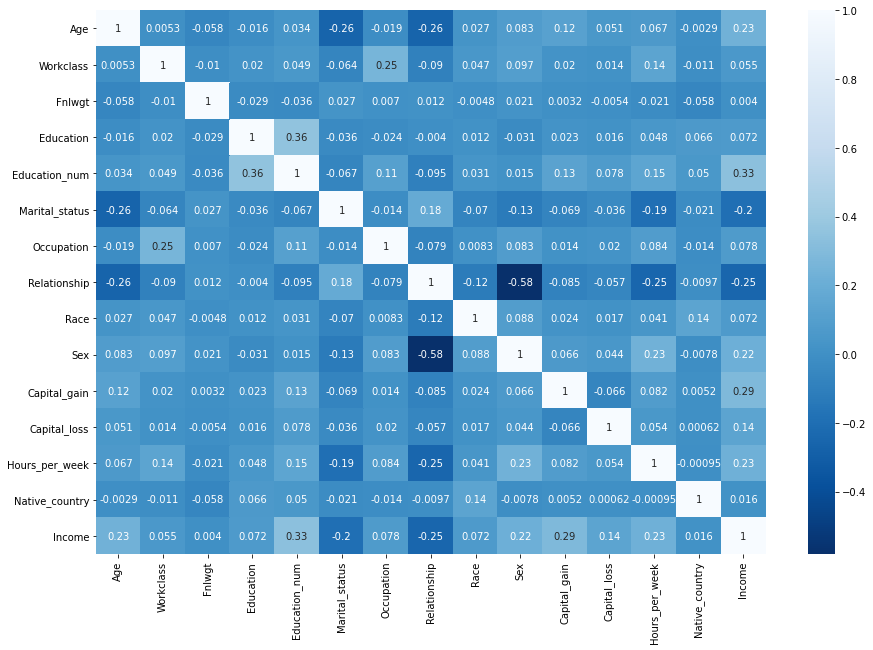

In [77]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True,cmap='Blues_r')

above heatmapshows the correlationship between target variable and input variables

In [47]:
df2['Income'].value_counts()

0    19702
1     6201
Name: Income, dtype: int64

spliting data into input features and target variable

In [48]:
x=df2.drop('Income',axis=1)

In [49]:
y=df2['Income']

importing classification algorithmns librarirs

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE

handling class imblanacing problem by over_samplig

In [51]:
sm=SMOTE()

In [52]:
x1,y1=sm.fit_resample(x,y)

spliting data fot training and testing

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=47)

In [54]:
print("x_train shape=",x_train.shape)
print("x_test shape=",x_test.shape)
print("y_train shape=",y_train.shape)
print("y_test shape=",x_test.shape)

x_train shape= (27582, 14)
x_test shape= (11822, 14)
y_train shape= (27582,)
y_test shape= (11822, 14)


In [55]:
lg=LogisticRegression()
dc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
sv=SVC()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()

In [56]:
list1=[lg,dc,knn,sv,rf,ad]
for i in list1:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print("accuracy_scores=",i)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

accuracy_scores= LogisticRegression()
0.753594992387075
[[4262 1585]
 [1328 4647]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75      5847
           1       0.75      0.78      0.76      5975

    accuracy                           0.75     11822
   macro avg       0.75      0.75      0.75     11822
weighted avg       0.75      0.75      0.75     11822

accuracy_scores= DecisionTreeClassifier()
0.8392826932837083
[[4808 1039]
 [ 861 5114]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      5847
           1       0.83      0.86      0.84      5975

    accuracy                           0.84     11822
   macro avg       0.84      0.84      0.84     11822
weighted avg       0.84      0.84      0.84     11822

accuracy_scores= KNeighborsClassifier()
0.8326002368465573
[[4265 1582]
 [ 397 5578]]
              precision    recall  f1-score   support

           0       0.91      0.73 

by observing different classification algoritmns's accuracy metrics, Random Forest Classifier gives more accuracy

Checking Area Under Curves of above algorithms

In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

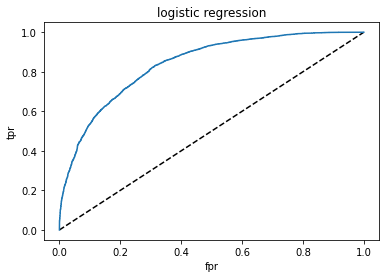

In [69]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='logistic regression')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("logistic regression")
plt.show()

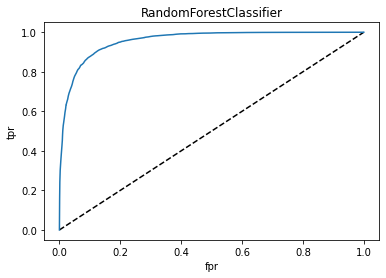

In [70]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("RandomForestClassifier")
plt.show()


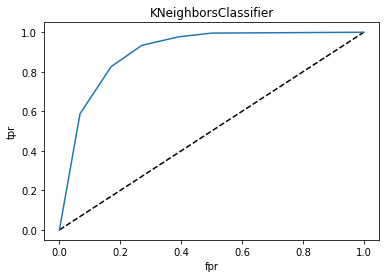

In [71]:
y_pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("KNeighborsClassifier")
plt.show()

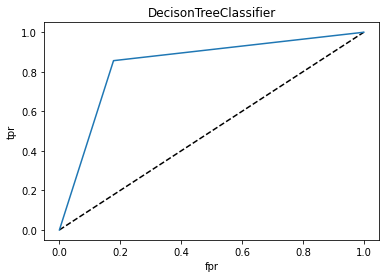

In [73]:
y_pred_prob=dc.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisonTreeClassifier')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("DecisonTreeClassifier")
plt.show()


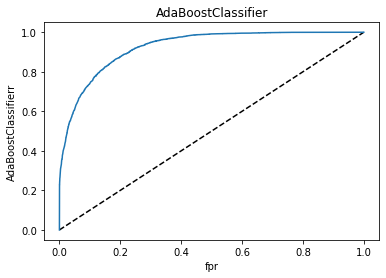

In [75]:
y_pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel("fpr")
plt.ylabel("AdaBoostClassifierr")
plt.title("AdaBoostClassifier")
plt.show()


above roc_curves show that random forest classifier have more area under curve than others

# Checking cross_val_scores

In [58]:
for i in list1:
    scores=cross_val_score(i,x1,y1,cv=5)
    print("cross_scores",i)
    print(scores.mean())

cross_scores LogisticRegression()
0.7536292290717828
cross_scores DecisionTreeClassifier()
0.8423259500295319
cross_scores KNeighborsClassifier()
0.833748116816323
cross_scores SVC()
0.7770785645873227
cross_scores RandomForestClassifier()
0.8918642890405956
cross_scores AdaBoostClassifier()
0.8381385707577886


by observing accuracy_score anf above cross_val_score, randomforestclassifier is best model comparing to others

# HyperParameterTunning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
 param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv=5)

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [61]:
grid.best_score_

0.8806830177355429

In [62]:
grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 30}

In [63]:
rf1=RandomForestClassifier(bootstrap=False,max_features= 'sqrt',min_samples_split=4,n_estimators=30)
rf1.fit(x_train,y_train)
rpred=rf1.predict(x_test)
cv3=cross_val_score(rf1,x1,y1,cv=5)
print("score",cv3)
print("accuracy_scores=",rf1)
print(accuracy_score(y_test,rpred))
print(confusion_matrix(y_test,rpred))
print(classification_report(y_test,rpred))

score [0.84583175 0.87019414 0.91447786 0.91054435 0.91408629]
accuracy_scores= RandomForestClassifier(bootstrap=False, max_features='sqrt',
                       min_samples_split=4, n_estimators=30)
0.8890204703095923
[[5099  748]
 [ 564 5411]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      5847
           1       0.88      0.91      0.89      5975

    accuracy                           0.89     11822
   macro avg       0.89      0.89      0.89     11822
weighted avg       0.89      0.89      0.89     11822



creating object file

In [64]:
import joblib

In [65]:
joblib.dump(rf1,'Census.obj')

['Census.obj']

In [66]:
f1=joblib.load('Census.obj')